In [1]:
# -*- coding: utf-8 -*-
__author__ = 'adindar'
# Dünya barışı için :)
# 2015_1107- ilk kod yazım zamanı

In [2]:
from datetime import datetime

# print datetime.now().strftime('%Y-%m-%d %H:%M:%S')+'\n'
print datetime.now().strftime('%Y-%m-%d %H:%M:%S') + '|' + 'Ahmet Anıl Dindar Çalışmaktadır |'

2016-07-12 00:30:48|Ahmet Anıl Dindar Çalışmaktadır |


## Buraya şimdi KYH'nin sayfasını okutalım ve en son depremin verilerini işletelim.


In [3]:
kyh_url = 'http://kyhdata.deprem.gov.tr/2K/kyhdata_v4.php' # KYH'nin güncel adresi

## ======================================================================
## **A** - Güncel KYH'den son depremin okunması

### KYH'nin okuması yapılır

In [4]:
# ============== download edelim # ==============
print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "| KYH'nin sayfası okunacak"
import urllib2
kyh_homepage_content = urllib2.urlopen( kyh_url )
kyh_html = kyh_homepage_content.read()
#print kyh_html # Gerekirse bu kısmı silebilirsin.
print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "| KYH'nin sayfası okundu"


2016-07-12 00:30:48| KYH'nin sayfası okunacak

2016-07-12 00:30:48| KYH'nin sayfası okundu


### Şimdi deprem listesinden son deprem kaydı bulunsun

In [5]:
print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "| KYH'nin sayfası parse edilecek\n"
kyh_data_satir = ''
kyh_data_satir = kyh_html.split('\n')
# muhtemelen pars ettik, şimdi teker teker bakalım

for i in kyh_data_satir:
    if i.find('</a></li><a href=') > 0 :
        baslangic = i.find('/2K/kyhdata_v4.php?dst') 
        bitis = i.find('" style="') 
        last_eqe_url = 'http://kyhdata.deprem.gov.tr/'+i[baslangic:bitis]
        print "Tebrikler, KYH'nin web sitesindeki en güncel deprem kaydını belirlediniz\n"+last_eqe_url


2016-07-12 00:30:49| KYH'nin sayfası parse edilecek

Tebrikler, KYH'nin web sitesindeki en güncel deprem kaydını belirlediniz
http://kyhdata.deprem.gov.tr//2K/kyhdata_v4.php?dst=TU9EVUxFX05BTUU9ZXZ0RmlsZSZNT0RVTEVfVEFTSz1zaG93Jk1PRFVMRV9TVUJUQVNLPWJ5RXZlbnRJRCZNT0RVTEVfVEFSR0VUPTc1ODcmVEFSR0VUX0xBVExPTj00MC42ODAwMCwyOS4yMTI4MA%3D%3D


In [12]:
print kyh_data_satir

['<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">', '<html xmlns="http://www.w3.org/1999/xhtml">', '<head>', '<meta http-equiv="Content-Type" content="text/html; charset=UTF8">', '<link href="../yapisal/stil.css" rel="stylesheet" type="text/css">', '<link href="../../yapisal/stil.css" rel="stylesheet" type="text/css">', '<script src="/dataFiles/maps/02/mscross.js" type="text/javascript"></script>', '<title>Daphne v4.0</title>', '<link rel="stylesheet" type="text/css" href="//cdn.datatables.net/1.10.4/css/jquery.dataTables.css">', '</head><body background="/img/open_back.gif" marginheight=0 marginwidth=0 topmargin=0 leftmargin=0>', '<center>', '<div style="height:54px;width:870px">', '<img src="/imgz/nav4/nb01_left.jpg"><img src="/imgz/nav4/navbar_01-splitter.jpg"><a href="/2K/kyhdata_v4.php"><img ', 'src="/imgz/nav4/navbar_01-home_off.jpg" border=0 alt="Home"></a><img ', 'src="/imgz/nav4/navbar_01-splitter.jpg"><a href="?dst=TU9EVUxFX05BTUU9ZWFydGhxdWFrZSZNT0RVTEVfVEFTS

### Şimdi güncel depremin kayıt edildiği istasyonlardan verileri alalım. 

In [6]:
# Güncel deprem sayfasından okumalar yapalım
print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "| Son depremin bilgileri aşağıdadır:\n"
last_eqe_content = urllib2.urlopen( last_eqe_url )
last_eqe_html = last_eqe_content.read()
last_eqe_satir = ''
last_eqe_satir = last_eqe_html.split('\n')
# Depremle ilgili kimlik bilgilerini alalım.
for i in last_eqe_satir:
    if i.find('<td class=coltype02_K') > 0:
        #print i
        baslangic =  i.find('>') +1
        bitis =  i.find('</')
        sol_kolon = i[baslangic:bitis]
    elif i.find('<td class=coltype02_v') > 0:
        #print i
        baslangic =  i.find('>') +1
        bitis =  i.find('</')
        sag_kolon = i[baslangic:bitis]
        eqe_satir = sol_kolon + " " +sag_kolon
        print eqe_satir
        # şimdi koordinatları alalım
        if eqe_satir.find('Lat') > 0:
            latitude = float( eqe_satir[eqe_satir.find(":")+1 :])
        elif eqe_satir.find('Lon') > 0:
            longitude = float( eqe_satir[eqe_satir.find(":")+1 :] )
        elif eqe_satir.find('Location') > 0:
            location =  eqe_satir[eqe_satir.find(":") +1 :]
        elif eqe_satir.find('Date : ') > 0:
            zaman =  eqe_satir[eqe_satir.find(":") +1 :]
            
# Bu hücredeki değerleri gözden geçirip daha güzel bir formata çevirmeli!    


2016-07-12 00:30:49| Son depremin bilgileri aşağıdadır:

EventID : 201606250540
MW : 4.2
Earthquake Date : 2016-06-25 05:40:11
MD : 
Epicenter Lat. : 40.68000
MS : 
Epicenter Lon. : 29.21280
MB : 
Epicentral Location : Marmara Denizi
ML : 
Total Records : 67
Depth : 5.73 km.
 
 


In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

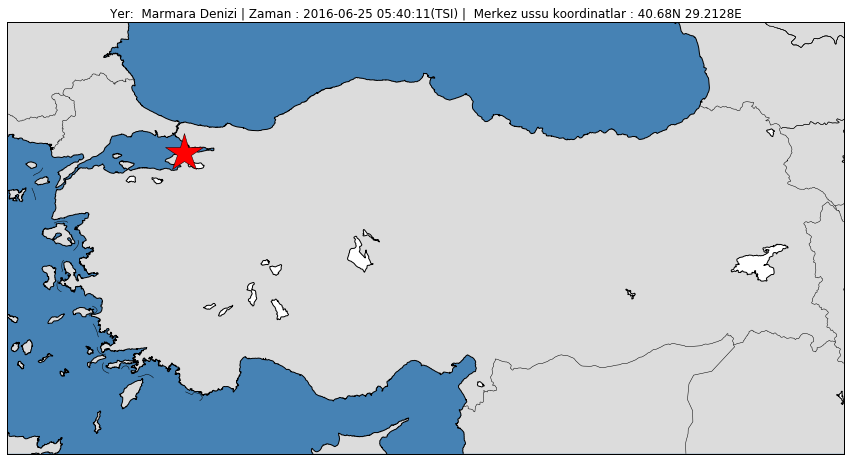

In [8]:
fig = plt.figure(figsize=(15,15))

themap = Basemap(projection='merc', #gall
              llcrnrlon = 25,              # lower-left corner longitude
              llcrnrlat = 35,               # lower-left corner latitude
              urcrnrlon = 45,               # upper-right corner longitude
              urcrnrlat = 43,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 100.0,
              )
themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

#haritada gösterm
x, y = themap(longitude , latitude)
themap.plot(x, y, 
            '*',                    # marker shape
            color='Red',         # marker colour
            markersize=40            # marker size
            )
plt.title("Yer: "+location+" | Zaman :"+zaman+"(TSI) |  Merkez ussu koordinatlar : "+ str(latitude) +"N " + str(longitude)+"E" )
plt.savefig('Son deprem.png')
plt.show()


## ======================================================================
### Alt tarafta yer alan görselleştirme biraz deneme amacıyla yapılmış bir çalışmadır.

Statik bir çizim yerine interaktif bir grafik kullanmak düşüncesiyle oluşturulmuştur. Oldukça ilgi çekici aslında zira çoklu depremler açısından bakıldığında (örneğin van depremleri) farklı bir bakış katacaktır. 

In [27]:
import folium
map_1 = folium.Map(location=[ latitude , longitude], zoom_start=10)
map_1.simple_marker([ latitude , longitude], popup='Mt. Hood Meadows',marker_icon='info-sign')
map_1.save('son_deprem.html')
!son_deprem.html

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
  app.launch_new_instance()


## ======================================================================

## ======================================================================
## **B** - Kayıt yapan istasyonların verilerinin okunması

Son depremin sayfasından kayıt yapan istasyonların bilgilerinin alınması

In [9]:
# Şimdi Son deprem sayfasındaki tüm kayıt yapan istasyonları çıkartalım.
istasyon_kayit_dataframe=[]
for i in last_eqe_satir:
    if i.find("<td class=coltype01><a target=_blank href=") > 0:
        # şimdi url bulalım
        baslangic = i.find(" href=") +7
        bitis = i.find('">')
        istasyon_kayit_url = ("http://kyhdata.deprem.gov.tr/"+ i[baslangic:bitis])
        # şimdi de istasyon kodu bulalım
        baslangic = i.find('">') +2
        bitis = i.find('</a>')
        istasyon_kayit_kod = ( i[baslangic:bitis])
        # bu kısmı çözemedim =======================================================
        istasyon_kayit_dataframe.append ((istasyon_kayit_kod , istasyon_kayit_url))
print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "| Son Depremde kayıt yapan istasyon sayısı : " + \
str(len(istasyon_kayit_dataframe))


2016-07-12 00:31:04| Son Depremde kayıt yapan istasyon sayısı : 67


### Şimdi tek tek tüm istasyonlardan alınacak verileri inceleyelim. 

## ======================================================================
## **C** - Eski kodları

# ============== url okuma# ==============
eqe_url = 'http://kyhdata.deprem.gov.tr/2K/genAcc.php?dst=TU9EVUxFX05BTUU9ZXZ0RmlsZSZNT0RVTEVfVEFTSz1kb3dubG9hZCZNT0RVTEVfU1VCVEFTSz1BTEwmTU9EVUxFX1RBUkdFVD1vbGQmVEFSR0VUPTIwMTUxMDI5MDk0NjM5XzY1MDU%3D'

#eqe_url = raw_input('URL Giriniz -->')

print datetime.now().strftime('%Y-%m-%d %H:%M:%S') + '| Okunacak deprem dosyası ' + eqe_url

# ============== download edelim # ==============

import urllib2
response = urllib2.urlopen( eqe_url )
eqe_html = response.read()

print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + '| Dosya okundu'

# ============== Deprem datasini gosterelim ==============

eqe_data_satir = ''
eqe_data_satir = eqe_html.split('\n')
eqe_x = [0]

counter = 1
for i in eqe_data_satir:
    if counter > 19: #and counter  < 30:
        satir = i.split(' ')
        #print len(satir)
        counter_satir = 1 
        for j in satir:
            if len(j) > 1:
                eqe_x.append(float(j))
    counter = counter + 1
#print eqe_x
time = range(len(eqe_x))
print('=======================================================\n')
print('Burada Deprem datasının minik bir kısmını gösteriyoruz.\n')
print eqe_x[1:100]
print('=======================================================\n')

print datetime.now().strftime('%Y-%m-%d %H:%M:%S') + '|' + 'Grafik bastirma|'
# ============== Görselleştirme ==============
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig.suptitle("Deprem Kaydi", fontsize=20)
plt.xlabel('Sure (sn)')
plt.ylabel('Yer Ivmesi (gal)')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xlim([4000,6000])
plt.plot(time ,  eqe_x ,'r-', linewidth=1)
fig.set_size_inches(18.5, 10.5)
fig.savefig('1-test2png.png', dpi=100)

# ============== Programın Sonu ==============
print'\n'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S') + '| Dosya okundu'